In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '20px'
      rule.style.color = 'black'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)
print("Hello in ")
print("...in larger font ")

<IPython.core.display.Javascript object>

Hello in 
...in larger font 


#HATE SPEECH DETECTION CHATBOT


### 1. Data Understanding
### 2. Data Preparation
### 3. Data Modeling
### 4. Data Validation

In [ ]:
import nltk
nltk.download('stopwords')

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<IPython.core.display.Javascript object>

Mounted at /content/drive


In [ ]:
tweet_df = pd.read_csv('/content/drive/MyDrive/train_data3v2.csv')
tweet_df.head()

<IPython.core.display.Javascript object>

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,Safe_Speech,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,Offensive_Speech,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,Offensive_Speech,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,Offensive_Speech,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,Offensive_Speech,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# Data Understanding

In [ ]:
# Viewing 5 rows from the top
tweet_df.head()

<IPython.core.display.Javascript object>

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,Safe_Speech,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,Offensive_Speech,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,Offensive_Speech,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,Offensive_Speech,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,Offensive_Speech,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
# dimensionality of dataset
tweet_df.shape

<IPython.core.display.Javascript object>

(44728, 6)

In [ ]:
# summary of dataset
tweet_df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44728 entries, 0 to 44727
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               44728 non-null  int64 
 1   hate_speech         44728 non-null  int64 
 2   offensive_language  44728 non-null  int64 
 3   neither             44728 non-null  int64 
 4   class               44728 non-null  object
 5   tweet               44728 non-null  object
dtypes: int64(4), object(2)
memory usage: 2.0+ MB


In [ ]:
# Frequency of each label
tweet_df['class'].value_counts()

<IPython.core.display.Javascript object>

Offensive_Speech    19190
Safe_Speech         13882
Hate_Speech         11656
Name: class, dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='class', ylabel='count'>

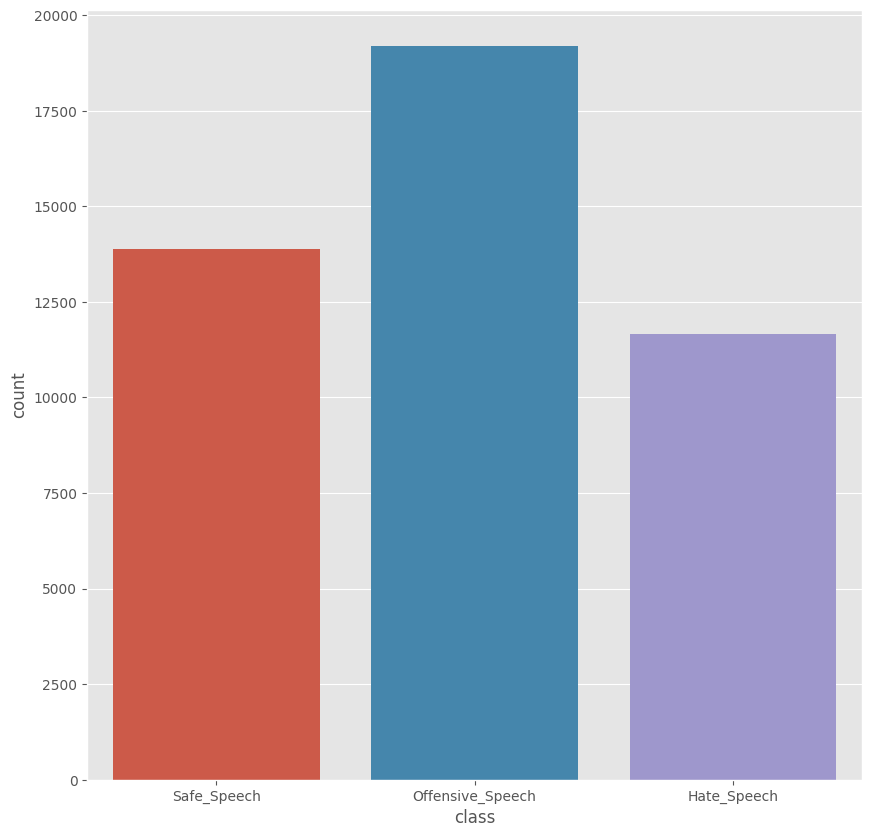

In [ ]:
# Count Plot
fig = plt.figure(figsize=(10,10))
sns.countplot(x='class', data = tweet_df)

#Pre-processing Data


In [ ]:
# Checking for null values
tweet_df.isna().sum().sum()

<IPython.core.display.Javascript object>

0

In [ ]:
# Renaming 'class' column to 'label'
tweet_df.rename(columns = {'class':'label'}, inplace = True)

<IPython.core.display.Javascript object>

In [ ]:
# Extracting columns 'label' and 'tweet'
tweet_df = tweet_df[['label','tweet']]

<IPython.core.display.Javascript object>

In [ ]:
# printing random tweets
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

<IPython.core.display.Javascript object>

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 



###The purpose of the function is to perform various text processing tasks on the input tweet and return a cleaned version of the tweet.

In [ ]:
def data_processing(text):
    pattern = r'https?://\S+|www\.\S+'
    text = re.sub(pattern, '', text)
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'ð', '', text)
    text = re.sub(r'rt', '', text)

    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


<IPython.core.display.Javascript object>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# apply data_processing function to each tweet
tweet_df['tweet'].head(10).apply(data_processing)


<IPython.core.display.Javascript object>

0    [woman, shouldnt, complain, cleaning, house, a...
1    [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...
2    [dawg, ever, fuck, bitch, sta, cry, confused, ...
3                                 [look, like, tranny]
4    [shit, hear, might, true, might, faker, bitch,...
5    [shit, blows, meclaim, faithful, somebody, sti...
6    [sit, hate, another, bitch, got, much, shit, g...
7    [cause, im, tired, big, bitches, coming, us, s...
8       [amp, might, get, ya, bitch, back, amp, thats]
9          [hobbies, include, fighting, mariam, bitch]
Name: tweet, dtype: object

##Modeling

In [ ]:
Tweet_train, Tweet_test, Label_train, Label_test = train_test_split(tweet_df['tweet'],
                                                                tweet_df['label'], test_size = 0.3, random_state = 101)

<IPython.core.display.Javascript object>

###1. Random Forest Classifier

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer = data_processing)),
    ('classifier', RandomForestClassifier(random_state = 101))
])

<IPython.core.display.Javascript object>

In [ ]:
pipeline.fit(Tweet_train, Label_train)

<IPython.core.display.Javascript object>

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function data_processing at 0x7f10b042fa30>)),
                ('classifier', RandomForestClassifier(random_state=101))])

In [ ]:
PP = pipeline.predict(Tweet_test)

<IPython.core.display.Javascript object>

In [ ]:
print(classification_report(Label_test, PP))

<IPython.core.display.Javascript object>

                  precision    recall  f1-score   support

     Hate_Speech       0.89      0.81      0.85      3405
Offensive_Speech       0.91      0.95      0.93      5853
     Safe_Speech       0.88      0.89      0.89      4161

        accuracy                           0.90     13419
       macro avg       0.89      0.88      0.89     13419
    weighted avg       0.90      0.90      0.89     13419



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(Label_test, PP, average=None, labels=['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

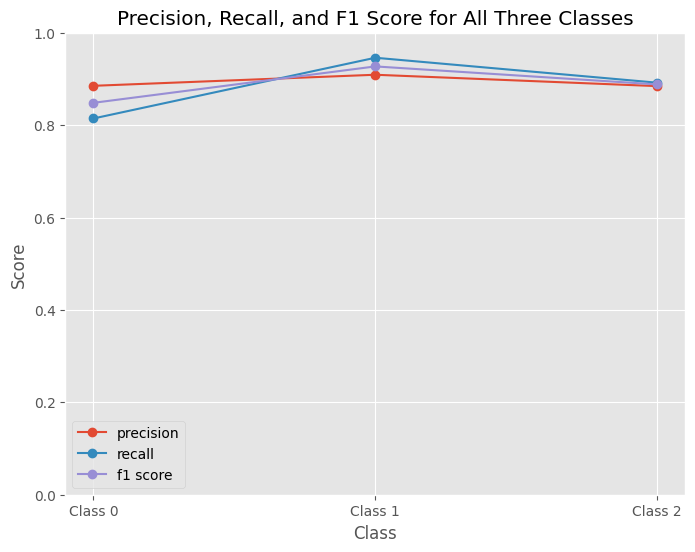

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], precision, 'o-', label='precision')
ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], recall, 'o-', label='recall')
ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], f1_score, 'o-', label='f1 score')

ax.set_xticks(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'])
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('Precision, Recall, and F1 Score for All Three Classes')

ax.legend(loc='best')
plt.show()


<IPython.core.display.Javascript object>

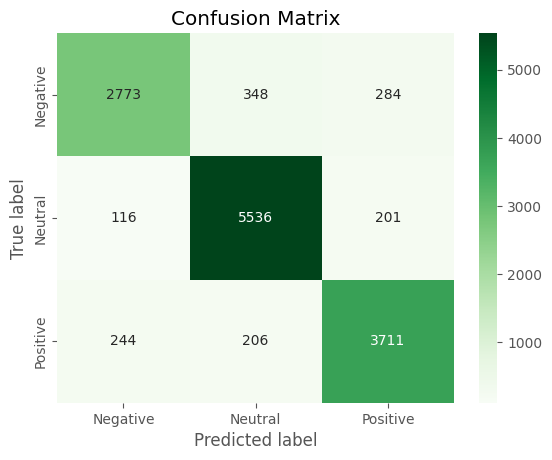

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Label_test, PP)

labels = ['Negative', 'Neutral', 'Positive']

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
cm = confusion_matrix(Label_test, PP)
print(cm)

<IPython.core.display.Javascript object>

[[2773  348  284]
 [ 116 5536  201]
 [ 244  206 3711]]


### 2.Logistic Regression

In [ ]:
p1 = Pipeline([
     ('tfidf', TfidfVectorizer(analyzer = data_processing)),
    ('classifier', LogisticRegression(max_iter=1000,random_state = 101))
])

<IPython.core.display.Javascript object>

In [ ]:
p1.fit(Tweet_train, Label_train)

<IPython.core.display.Javascript object>

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function data_processing at 0x7f10b042fa30>)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=101))])

In [ ]:
PLogR = p1.predict(Tweet_test)
print(classification_report(Label_test, PLogR))

<IPython.core.display.Javascript object>

                  precision    recall  f1-score   support

     Hate_Speech       0.88      0.82      0.85      3405
Offensive_Speech       0.94      0.92      0.93      5853
     Safe_Speech       0.86      0.93      0.89      4161

        accuracy                           0.90     13419
       macro avg       0.89      0.89      0.89     13419
    weighted avg       0.90      0.90      0.90     13419



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(Label_test, PLogR, average=None, labels=['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

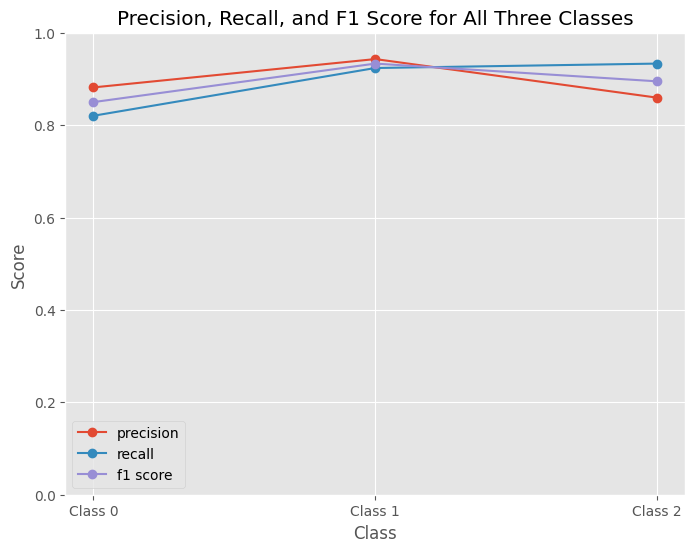

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], precision, 'o-', label='precision')
ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], recall, 'o-', label='recall')
ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], f1_score, 'o-', label='f1 score')

ax.set_xticks(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'])
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('Precision, Recall, and F1 Score for All Three Classes')

ax.legend(loc='best')
plt.show()


<IPython.core.display.Javascript object>

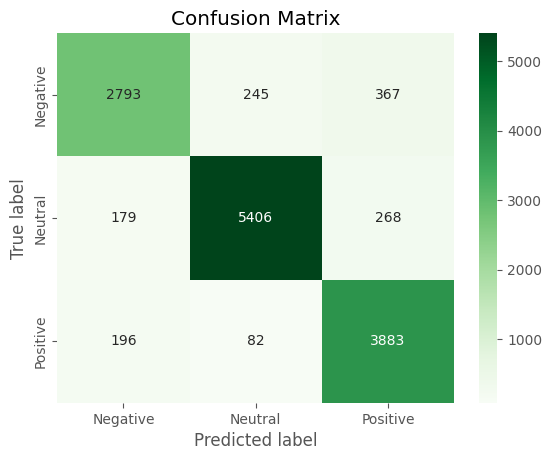

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Label_test, PLogR)

labels = ['Negative', 'Neutral', 'Positive']

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
cm = confusion_matrix(Label_test, PLogR)
print(cm)

<IPython.core.display.Javascript object>

[[2793  245  367]
 [ 179 5406  268]
 [ 196   82 3883]]


###3. Multinomial Naive Bayes

In [ ]:
p2 = Pipeline([
     ('tfidf', TfidfVectorizer(analyzer = data_processing)),
    ('classifier', MultinomialNB())
])

<IPython.core.display.Javascript object>

In [ ]:
p2.fit(Tweet_train, Label_train)

<IPython.core.display.Javascript object>

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function data_processing at 0x7f10b042fa30>)),
                ('classifier', MultinomialNB())])

In [ ]:
PNB = p2.predict(Tweet_test)
print(classification_report(Label_test, PNB))

<IPython.core.display.Javascript object>

                  precision    recall  f1-score   support

     Hate_Speech       0.92      0.76      0.83      3405
Offensive_Speech       0.75      0.98      0.85      5853
     Safe_Speech       0.93      0.67      0.78      4161

        accuracy                           0.83     13419
       macro avg       0.87      0.80      0.82     13419
    weighted avg       0.85      0.83      0.82     13419



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(Label_test, PNB, average=None, labels=['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

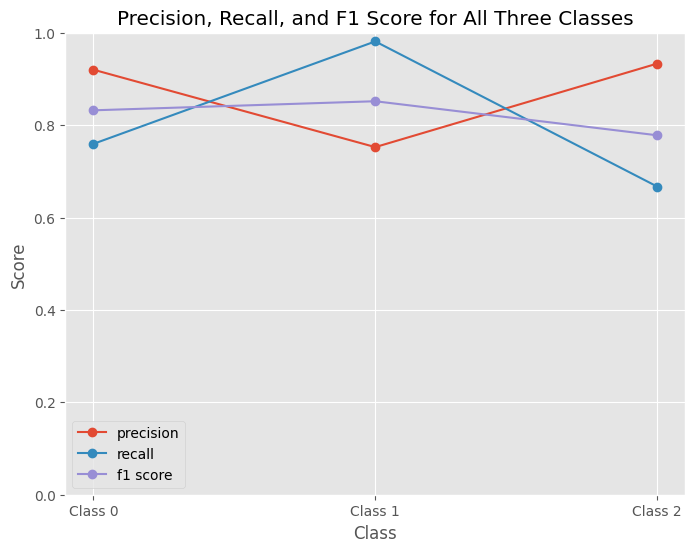

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], precision, 'o-', label='precision')
ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], recall, 'o-', label='recall')
ax.plot(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'], f1_score, 'o-', label='f1 score')

ax.set_xticks(['Hate_Speech', 'Offensive_Speech', 'Safe_Speech'])
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('Precision, Recall, and F1 Score for All Three Classes')

ax.legend(loc='best')
plt.show()


<IPython.core.display.Javascript object>

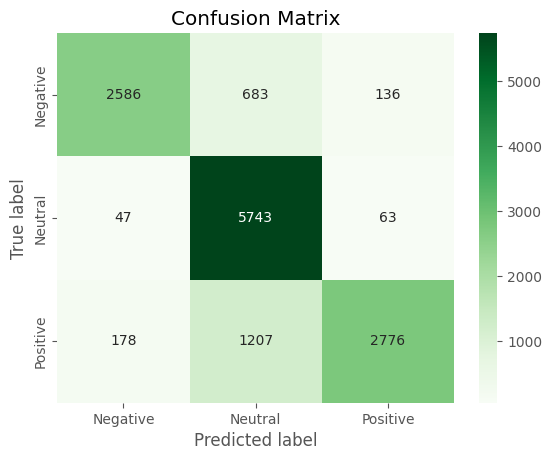

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Label_test, PNB)

labels = ['Negative', 'Neutral', 'Positive']

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
cm = confusion_matrix(Label_test, PNB)
print(cm)

<IPython.core.display.Javascript object>

[[2586  683  136]
 [  47 5743   63]
 [ 178 1207 2776]]


##Validation

<IPython.core.display.Javascript object>

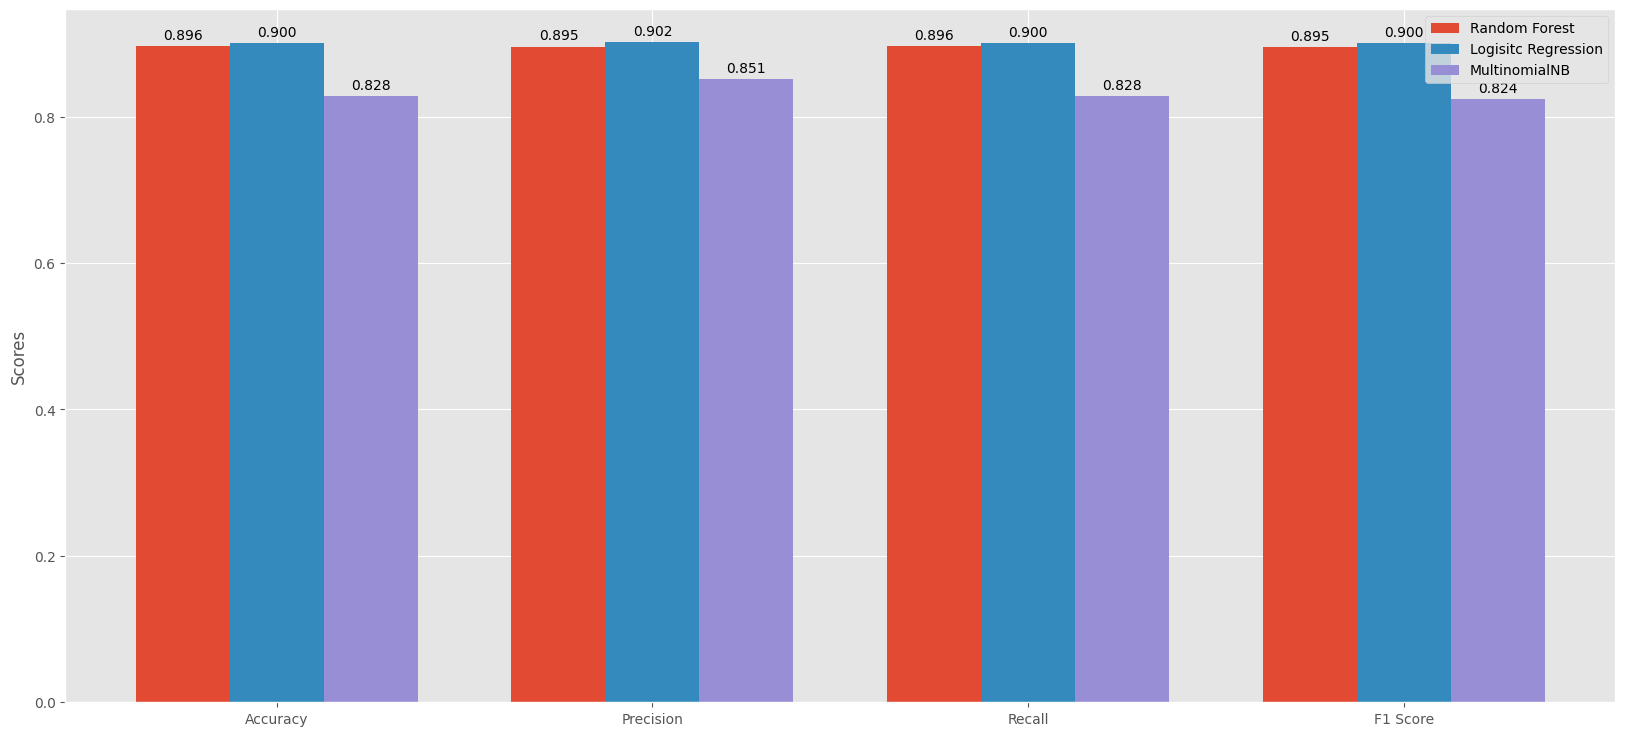

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np


PP_acc = accuracy_score(Label_test, PP)
PP_prec = precision_score(Label_test, PP, average='weighted')
PP_rec = recall_score(Label_test, PP, average='weighted')
PP_f1 = f1_score(Label_test,PP, average='weighted')

p1_acc = accuracy_score(Label_test, PLogR)
p1_prec = precision_score(Label_test, PLogR, average='weighted')
p1_rec = recall_score(Label_test, PLogR, average='weighted')
p1_f1 = f1_score(Label_test, PLogR, average='weighted')

p2_acc = accuracy_score(Label_test, PNB)
p2_prec = precision_score(Label_test, PNB, average='weighted')
p2_rec = recall_score(Label_test, PNB, average='weighted')
p2_f1 = f1_score(Label_test, PNB, average='weighted')

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
pipeline_scores = [PP_acc, PP_prec, PP_rec, PP_f1]
p1_scores = [p1_acc, p1_prec, p1_rec, p1_f1]
p2_scores = [p2_acc, p2_prec, p2_rec, p2_f1]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(20, 9))
rects1 = ax.bar(x - width, pipeline_scores, width, label='Random Forest')
rects2 = ax.bar(x, p1_scores, width, label='Logisitc Regression')
rects3 = ax.bar(x + width, p2_scores, width, label='MultinomialNB')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


<IPython.core.display.Javascript object>

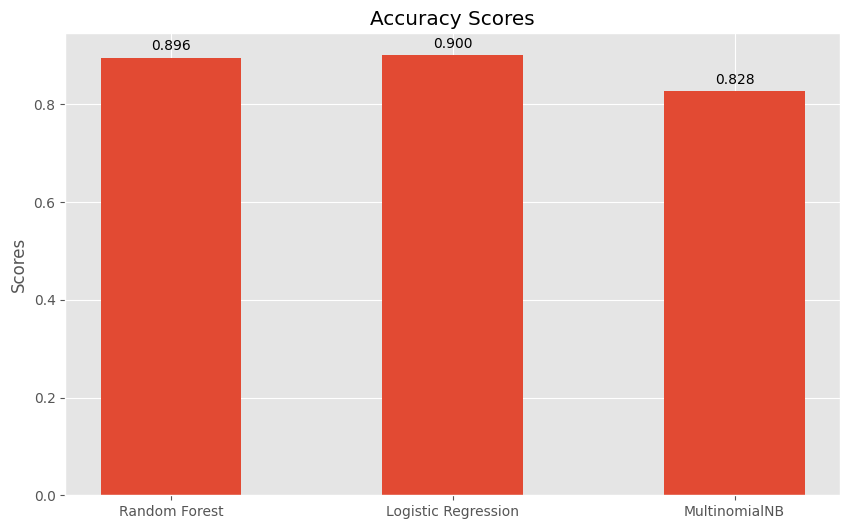

In [ ]:
labels = ['Random Forest', 'Logistic Regression', 'MultinomialNB']
scores = [PP_acc, p1_acc, p2_acc]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(x, scores, width)

ax.set_ylabel('Scores')
ax.set_title('Accuracy Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.show()


<IPython.core.display.Javascript object>

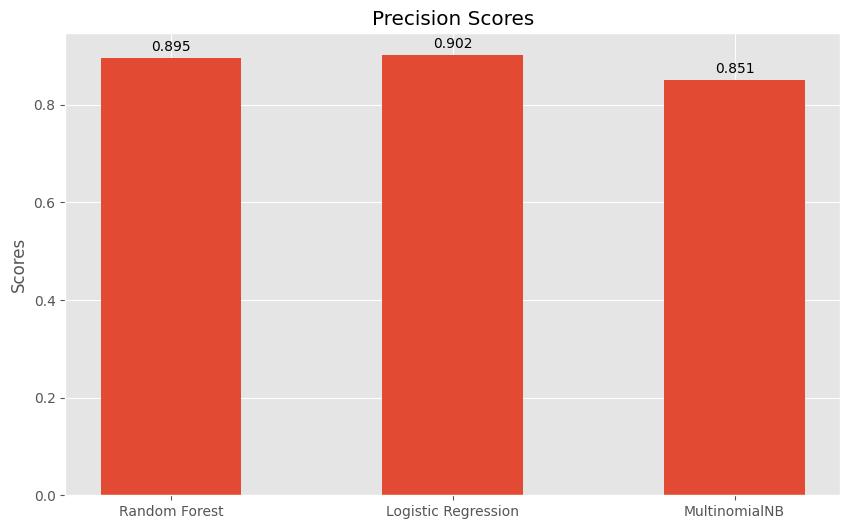

In [ ]:
labels = ['Random Forest', 'Logistic Regression', 'MultinomialNB']
scores = [PP_prec, p1_prec, p2_prec]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(x, scores, width)

ax.set_ylabel('Scores')
ax.set_title('Precision Scores')

ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(rects)

plt.show()

<IPython.core.display.Javascript object>

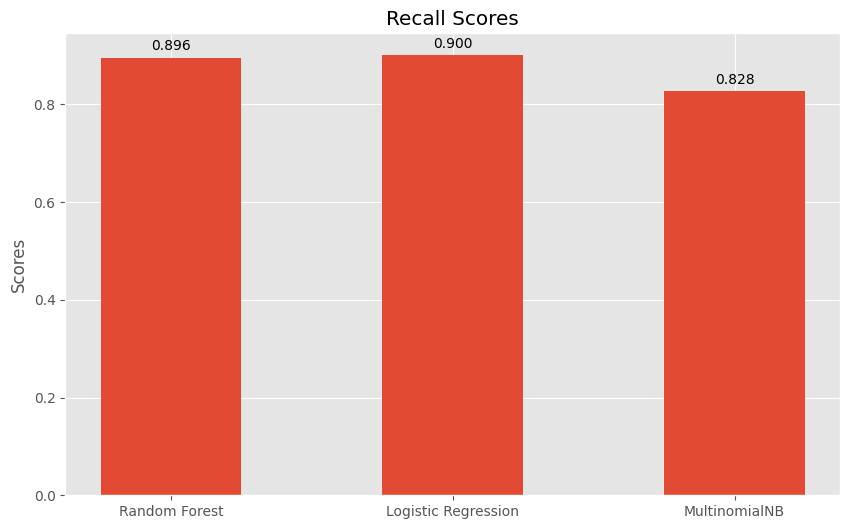

In [ ]:
labels = ['Random Forest', 'Logistic Regression', 'MultinomialNB']
scores = [PP_rec, p1_rec, p2_rec]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(x, scores, width)

ax.set_ylabel('Scores')
ax.set_title('Recall Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(rects)

plt.show()

<IPython.core.display.Javascript object>

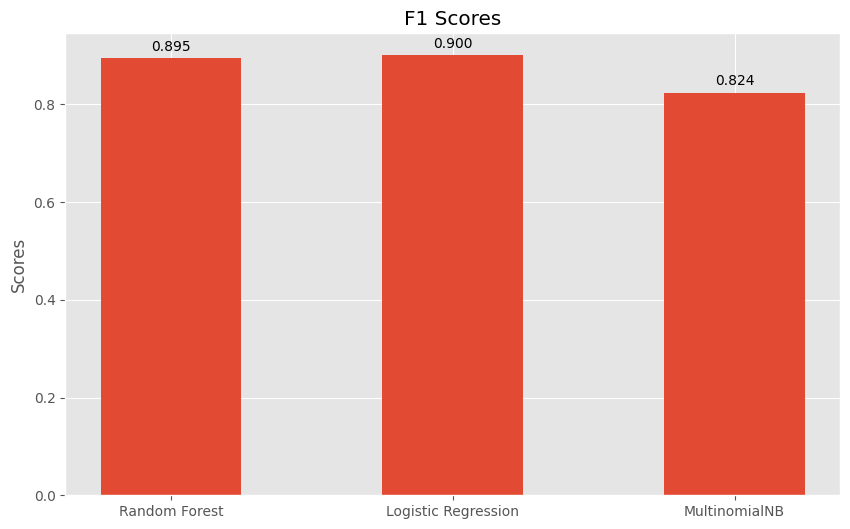

In [ ]:
labels = ['Random Forest', 'Logistic Regression', 'MultinomialNB']
scores = [PP_f1, p1_f1, p2_f1]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(x, scores, width)

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('F1 Scores')

autolabel(rects)

plt.show()

In [ ]:


training_score = pipeline.score(Tweet_train, Label_train)
testing_score = accuracy_score(Label_test, PP)

print("Training and Testing Score of Random Forest")
print("Training score: {:.3f}".format(training_score))
print("Testing score: {:.3f}".format(testing_score))

training_score = p1.score(Tweet_train, Label_train)
testing_score = accuracy_score(Label_test, PLogR )

print("\nTraining and Testing Score of Logistic Regression")
print("Training score: {:.3f}".format(training_score))
print("Testing score: {:.3f}".format(testing_score))

training_score = p2.score(Tweet_train, Label_train)
testing_score = accuracy_score(Label_test, PNB )

print("\nTraining and Testing Score of Multinomial Naive Bayes")
print("Training score: {:.3f}".format(training_score))
print("Testing score: {:.3f}".format(testing_score))

<IPython.core.display.Javascript object>

Training and Testing Score of Random Forest
Training score: 0.999
Testing score: 0.896

Training and Testing Score of Logistic Regression
Training score: 0.941
Testing score: 0.900

Training and Testing Score of Multinomial Naive Bayes
Training score: 0.886
Testing score: 0.828


<IPython.core.display.Javascript object>

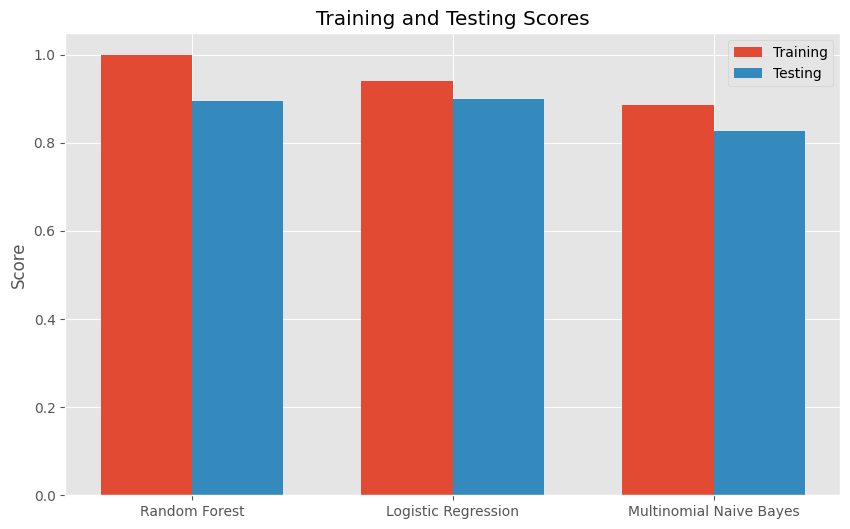

In [ ]:
training_scores = [pipeline.score(Tweet_train, Label_train),
                   p1.score(Tweet_train, Label_train),
                   p2.score(Tweet_train, Label_train)]
testing_scores = [accuracy_score(Label_test, PP),
                  accuracy_score(Label_test, PLogR),
                  accuracy_score(Label_test, PNB)]

x = np.arange(len(training_scores))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, training_scores, width, label='Training')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(['Random Forest', 'Logistic Regression', 'Multinomial Naive Bayes'])
ax.legend()
ax.set_title('Training and Testing Scores')

plt.show()


In [ ]:
def class_output(text):
    s = pd.Series([text])
    y_pred = p1.predict(s)
    if y_pred == "Hate_Speech":
        print("This is a hate speech.")
    elif y_pred == "Offensive_Speech":
        print("This is an offensive speech.")
    else:
        print("This is a safe speech.")

<IPython.core.display.Javascript object>

In [ ]:
class_output("the average life span of black people is high")

<IPython.core.display.Javascript object>

This is a hate speech.


In [ ]:
class_output("Hey you there")

<IPython.core.display.Javascript object>

This is a safe speech.


In [ ]:
class_output("Hey you bitch")

<IPython.core.display.Javascript object>

This is an offensive speech.
